In [21]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

import config

from transmitted import tx_signal

### defining the configs

In [22]:
# # --- Radar Hardware & Waveform ---
# C = 3e8                      # Speed of light (m/s)
# FC = 10e9                    # 10 GHz (X-band)
# LAMBDA = C / FC              # Wavelength (0.03 meters)
# B = 150e6                    # Bandwidth (150 MHz)
# TC = 2e-3                    # Chirp time (2ms)
# SLOPE = B / TC               # Chirp slope (Hz/s)

# # --- Sampling & Resolution ---
# FS = 2.5e6                   # Sampling rate (2.5 MHz)
# N_SAMPLES = int(FS * TC)     # Number of samples per chirp (5000 samples)
# R_MAX = 150000               # Max range (150 KM)
# RANGE_RES = C / (2 * B)      # Range resolution (1.0 meter)

# # --- Target Specs ---
# MIN_RCS = 0.01               # Stealth target RCS (m^2)
# BOLTZMANN = 1.38e-23         # Boltzmann constant

the received signal equation: 
$$s_{rx}(t) = \alpha \cdot \cos(2\pi (f_c (t - t_d) + \frac{1}{2} K (t - t_d)^2))$$

the missing variable is the t_delay (the delay in the signal)

$$t_d (Delay): \frac{2 \times \text{Distance}}{c}$$

In [23]:
# now we do exactly as we did in the transmitted signal

B = config.B
TC = config.TC
FC = config.FC
FS = config.FS
N_SAMPLES = config.N_SAMPLES
c = config.C

target_dist = 150     # Target is 30 meters away
td = 2 * target_dist / c  # Round trip delay

# define the t as an array
t = np.linspace(0,TC,N_SAMPLES)

t_delay = t - td

rx_signal = np.where(t >= td,
                    np.cos(2 * np.pi * ((FC * (t-td) + ((B * (t-td)**2) / (2 * TC))))),
                    0)

### plotting

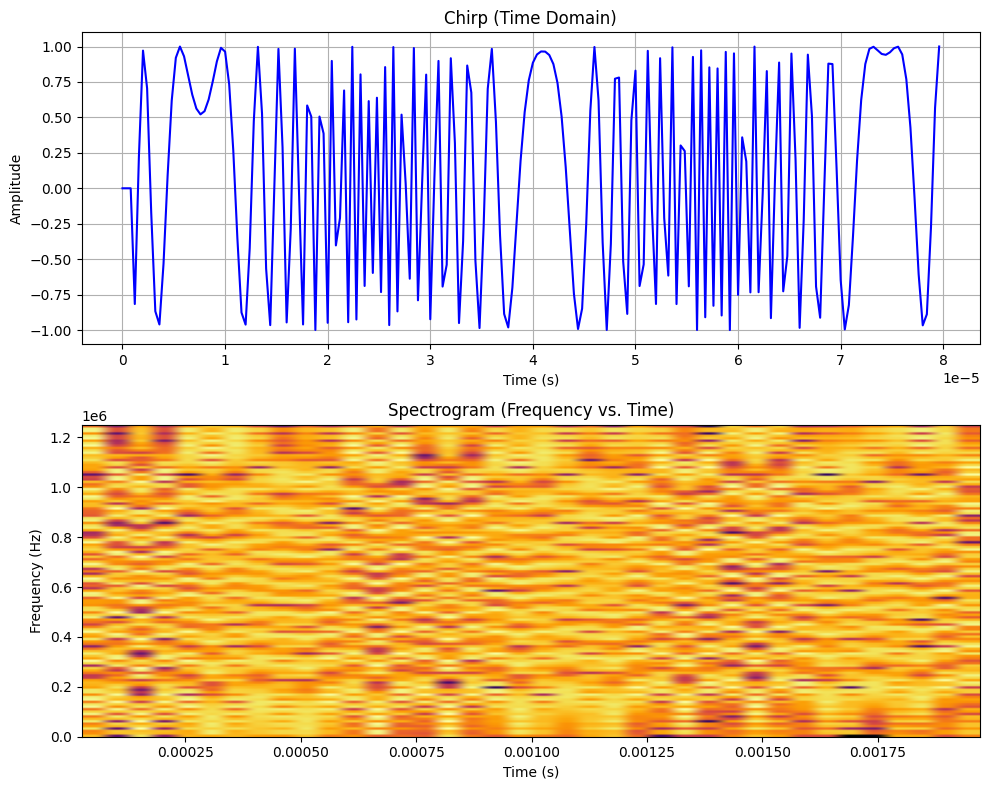

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 1. Time Domain (The Waveform)
ax1.set_title("Chirp (Time Domain)")
ax1.plot(t[:200], rx_signal[:200], color='blue') # Zoom in on first 100 samples
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax1.grid(True)

# 2. Frequency Domain (Spectrogram)
# This proves the frequency is actually climbing over time
ax2.set_title("Spectrogram (Frequency vs. Time)")
ax2.specgram(rx_signal, Fs=FS, cmap='inferno')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()


### comparing the 2 signals 

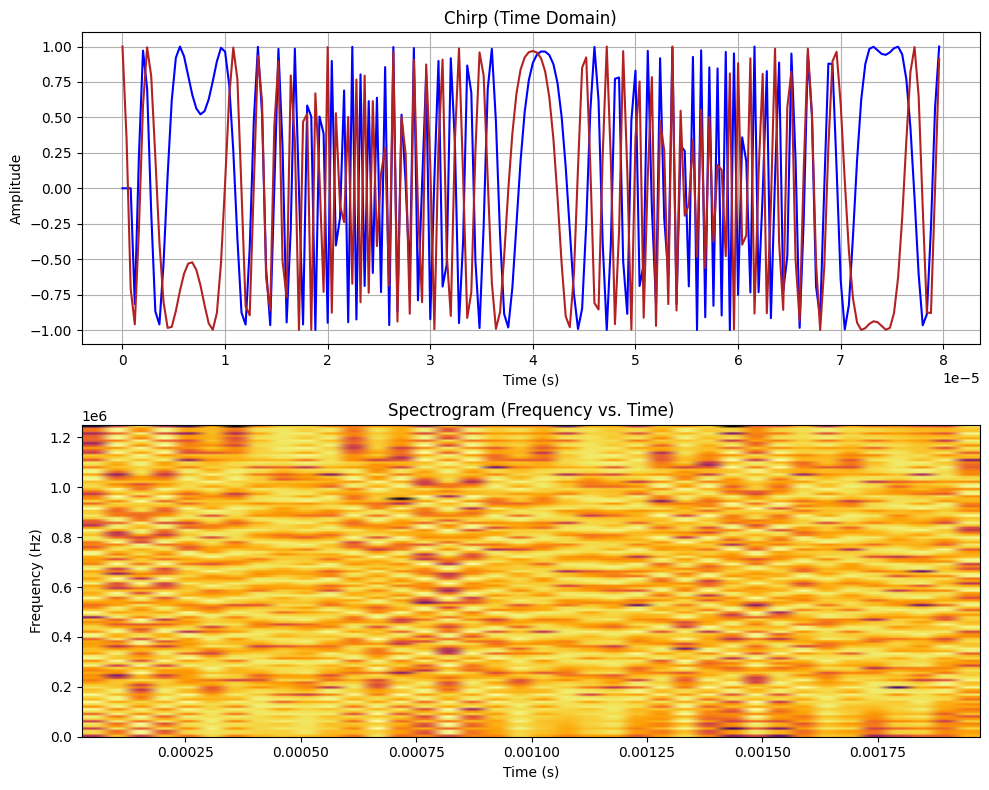

In [25]:
tx_signal = transmitted.tx_signal

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 1. Time Domain (The Waveform)
ax1.set_title("Chirp (Time Domain)")
ax1.plot(t[:200], rx_signal[:200], color='blue') # Zoom in on first 100 samples
ax1.plot(t[:200], tx_signal[:200], color='firebrick') # Zoom in on first 100 samples
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax1.grid(True)

# 2. Frequency Domain (Spectrogram)
# This proves the frequency is actually climbing over time
ax2.set_title("Spectrogram (Frequency vs. Time)")
ax2.specgram(rx_signal, Fs=FS, cmap='inferno')
ax2.specgram(tx_signal, Fs=FS, cmap='inferno')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()
